In [ ]:
#Potential requirement is qiskit 0.24
#Meta data is printed to output_file.txt
#Some other print data is printed out directly

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import os
from qiskit import IBMQ, Aer
import re 



print(qiskit.__qiskit_version__)



IBMQ.load_account()


first=1

file_name='output_file.txt'

att_list=[]

import re
pattern = re.compile("simulator")

for provider in IBMQ.providers():
    print(provider)

    for device in provider.backends():
        print(device)
        if(pattern.search(str(device))):
            print("Simulator!")
            continue

        if(first):
            file1 = open(file_name, 'w')
            first=0
        else:
            file1 = open(file_name, 'a')
        list_jobs = device.jobs(limit=1000)
        print("Number of jobs =", len(list_jobs))
        count=0
        for job in list_jobs:
            try:
                count+=1
                #print(job.job_id())
                if(str(job.status()) == "JobStatus.DONE"):

                    circ_list = job.circuits()
                    if "count_ops" not in dir(circ_list[0]):
                        att=dict()    
                        # What are the attributes we need
                        # 1. Job times - runtime
                        time_step = job.time_per_step()
                        att['runtime'] = (time_step.get('COMPLETED',0)-time_step.get('RUNNING',0)).total_seconds()/60.0
                        #2 queuetime
                        att['queuetime'] = (time_step.get('RUNNING',0)-time_step.get('QUEUED',0)).total_seconds()/60.0
                        # 3. Machine name
                        att['machine'] = str(device)
                        # 4. Date
                        att['date'] = str(job.creation_date())
                        # 5. Job Status
                        att['status'] = str(job.status())
                        # 6. batch size
                        att['batch'] = len(circ_list)
                        # 7. shots
                        backend_options = job.backend_options()
                        att['shots'] = backend_options.get('shots',0)
                        # 8. depth
                        att['depth'] = 0
                        # 9 . width
                        att['width'] = 0
                        # 10. memory slots (not sure about this)
                        att['memory'] = backend_options.get('memory_slots',0)
                        # 11 . total_qubits
                        att['qubits'] = backend_options.get('n_qubits',0)
                        # 12 . total_gateops
                        att['gateops'] = 0
                        #13. pulse
                        if(str(circ_list[0].__class__.__name__)=="Schedule"):
                            pulse=1
                        else:
                            pulse=0
                        att['pulse'] = pulse
                    else:
                        att=dict()    
                        # What are the attributes we need
                        # 1. Job times - runtime
                        time_step = job.time_per_step()
                        att['runtime'] = (time_step.get('COMPLETED',0)-time_step.get('RUNNING',0)).total_seconds()/60.0
                        #2 queuetime
                        att['queuetime'] = (time_step.get('RUNNING',0)-time_step.get('QUEUED',0)).total_seconds()/60.0
                        # 3. Machine name
                        att['machine'] = str(device)
                        # 4. Date
                        att['date'] = str(job.creation_date())
                        # 5. Job Status
                        att['status'] = str(job.status())
                        # 6. batch size
                        att['batch'] = len(circ_list)
                        # 7. shots
                        backend_options = job.backend_options()
                        att['shots'] = backend_options.get('shots',0)
                        # 8. depth
                        att['depth'] = circ_list[0].depth()
                        # 9 . width
                        att['width'] = circ_list[0].count_ops().get('measure',0)
                        # 10. memory slots (not sure about this)
                        att['memory'] = backend_options.get('memory_slots',0)
                        # 11 . total_qubits
                        att['qubits'] = backend_options.get('n_qubits',0)
                        # 12 . total_gateops
                        att['gateops'] = circ_list[0].size()
                        #13. pulse
                        if(str(circ_list[0].__class__.__name__)=="Schedule"):
                            pulse=1
                        else:
                            pulse=0
                        att['pulse'] = pulse                        

                else:
                    att=dict()    
                    # What are the attributes we need
                    # 1. Job times - runtime
                    att['runtime'] = 0
                    #2 queuetime
                    att['queuetime'] = 0
                    # 3. Machine name
                    att['machine'] = str(device)
                    # 4. Date
                    att['date'] = str(job.creation_date())
                    # 5. Job Status
                    att['status'] = str(job.status())
                    # 6. batch size
                    att['batch'] = 0
                    # 7. shots
                    att['shots'] = 0
                    # 8. depth
                    att['depth'] = 0
                    # 9 . width
                    att['width'] = 0
                    # 10. memory slots (not sure about this)
                    att['memory'] = 0
                    # 11 . total_qubits
                    att['qubits'] = 0
                    # 12 . total_gateops
                    att['gateops'] = 0
                    #13. pulse
                    att['pulse'] = 0
                att_list.append(att)
                file1.write(str([att['runtime'],att['queuetime'],att['machine'],att['date'],att['status'],att['batch'],att['shots'],att['depth'],att['width'],att['memory'],att['qubits'],att['gateops'],att['pulse']])+'\n') 
                #print(count)
            except:
                print("'Skipping!")

        file1.close() 

In [ ]:
#Potential requirement is qiskit 0.24
#Meta data is printed to output_file.txt
#Some other print data is printed out directly

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import os
from qiskit import IBMQ, Aer
import re 
import time



#print(qiskit.__qiskit_version__)



IBMQ.load_account()


first=1

file_name='output_file.txt'

device_list=dict()

import re
pattern = re.compile("simulator")

while(True):
    for provider in IBMQ.providers():
        #print(provider)

        for device in provider.backends():
            #print(device)
            if(pattern.search(str(device))):
                #print("Simulator!")
                continue
            #print("active: ",device.active_jobs())
            #print("limit / max: ",device.job_limit().maximum_jobs)
            #print("limit / active: ",device.job_limit().active_jobs)
            #print("remaining: ",device.remaining_jobs_count())
            #print("pending: ", device.status().pending_jobs)
            device_list[str(device)]=device.status().pending_jobs

    print_string = ""
    if(first):
        for key in device_list:
            print_string+=str(key)
            print_string+=","
        print(print_string)
        print_string=""
        first=0
    for key in device_list:
        print_string+=str(device_list[key])
        print_string+=","
    print(print_string)
    print_string=""
    time.sleep(60*15)
        



ibmqx2,ibmq_16_melbourne,ibmq_armonk,ibmq_athens,ibmq_santiago,ibmq_lima,ibmq_belem,ibmq_quito,ibmq_paris,ibmq_rome,ibmq_toronto,ibmq_bogota,ibmq_manhattan,ibmq_casablanca,ibmq_guadalupe,
842,10874,18,8647,2976,219,123,174,299,292,492,1254,880,1881,163,
841,10883,18,8650,2951,219,117,175,305,290,499,1257,879,1880,163,
841,10889,19,8647,2927,219,124,172,298,286,505,1233,878,1880,162,
840,10888,19,8646,2904,219,124,180,298,301,513,1216,877,1880,161,
847,10887,21,8653,2893,215,129,181,297,337,557,1198,876,1880,161,
965,10887,20,8649,2886,216,139,180,296,371,552,1175,875,1881,161,
967,10883,21,8648,2887,218,133,181,295,381,556,1154,874,1883,161,
967,10880,20,8650,2883,216,125,180,294,364,556,1144,873,1883,160,
966,10878,21,8651,2885,216,123,181,294,378,550,1130,871,1881,160,
965,10878,21,8649,2876,216,125,181,293,387,544,1150,869,1916,160,
970,10877,21,8648,2878,211,125,173,293,387,538,1150,868,2040,160,
970,10877,20,8647,2873,217,133,172,293,386,533,1149,865,2158,161,
970,10878,17,8644,28

In [1]:
#Potential requirement is qiskit 0.24
#Meta data is printed to output_file.txt
#Some other print data is printed out directly

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import qiskit
import os
from qiskit import IBMQ, Aer
import re 
import time



#print(qiskit.__qiskit_version__)



IBMQ.load_account()


first=1

file_name='output_file.txt'

device_list=dict()

import re
pattern = re.compile("simulator")

while(True):
    for provider in IBMQ.providers():
        #print(provider)

        for device in provider.backends():
            #print(device)
            if(pattern.search(str(device))):
                #print("Simulator!")
                continue
            #print("active: ",device.active_jobs())
            #print("limit / max: ",device.job_limit().maximum_jobs)
            #print("limit / active: ",device.job_limit().active_jobs)
            #print("remaining: ",device.remaining_jobs_count())
            #print("pending: ", device.status().pending_jobs)
            device_list[str(device)]=device.status().pending_jobs

    print_string = ""
    if(first):
        for key in device_list:
            print_string+=str(key)
            print_string+=","
        print(print_string)
        print_string=""
        first=0
    for key in device_list:
        print_string+=str(device_list[key])
        print_string+=","
    print(print_string)
    print_string=""
    time.sleep(60*15)

ibmqx2,ibmq_16_melbourne,ibmq_armonk,ibmq_athens,ibmq_santiago,ibmq_lima,ibmq_belem,ibmq_quito,ibmq_paris,ibmq_rome,ibmq_toronto,ibmq_bogota,ibmq_manhattan,ibmq_casablanca,ibmq_guadalupe,
806,10933,15,8646,1323,193,94,170,292,388,589,1159,784,2265,143,
780,10934,14,8647,1299,196,97,165,292,388,588,1175,782,2265,142,
750,10932,10,8643,1282,187,96,163,291,388,590,1158,780,2265,143,
743,10931,10,8643,1260,198,93,167,291,388,590,1170,780,2263,142,
739,10928,9,8644,1245,201,95,162,292,388,591,1170,780,2259,141,
748,10931,9,8645,1229,202,92,166,293,388,591,1172,780,2255,142,
748,10928,8,8644,1221,203,91,162,325,389,589,1158,781,2254,143,
748,10929,7,8645,1202,207,95,165,374,388,669,1169,1013,2259,183,
748,10927,5,8645,1214,209,96,169,374,387,669,1176,1013,2244,182,
742,10934,0,8646,1217,209,94,168,374,381,653,1178,1014,2178,183,
749,10930,1,8651,1216,207,95,170,375,379,643,1178,1014,2117,184,
754,10928,0,8649,1215,207,89,171,375,379,630,1179,1014,2053,187,
754,10928,0,8645,1213,206,85,168,37

KeyboardInterrupt: 

In [2]:
all_data=[[842,10874,18,8647,2976,219,123,174,299,292,492,1254,880,1881,163],
[841,10883,18,8650,2951,219,117,175,305,290,499,1257,879,1880,163],
[841,10889,19,8647,2927,219,124,172,298,286,505,1233,878,1880,162],
[840,10888,19,8646,2904,219,124,180,298,301,513,1216,877,1880,161],
[847,10887,21,8653,2893,215,129,181,297,337,557,1198,876,1880,161],
[965,10887,20,8649,2886,216,139,180,296,371,552,1175,875,1881,161],
[967,10883,21,8648,2887,218,133,181,295,381,556,1154,874,1883,161],
[967,10880,20,8650,2883,216,125,180,294,364,556,1144,873,1883,160],
[966,10878,21,8651,2885,216,123,181,294,378,550,1130,871,1881,160],
[965,10878,21,8649,2876,216,125,181,293,387,544,1150,869,1916,160],
[970,10877,21,8648,2878,211,125,173,293,387,538,1150,868,2040,160],
[970,10877,20,8647,2873,217,133,172,293,386,533,1149,865,2158,161],
[970,10878,17,8644,2877,219,128,175,292,381,527,1151,862,2180,160],
[964,10877,17,8645,2872,219,133,178,291,367,524,1150,860,2181,160],
[955,10882,17,8644,2864,220,132,177,291,361,522,1153,859,2182,160],
[970,10881,16,8645,2850,219,133,174,291,361,521,1151,856,2182,160],
[969,10878,17,8645,2840,219,130,173,290,361,519,1154,854,2183,160],
[962,10881,17,8644,2833,219,125,172,290,365,519,1153,851,2183,159],
[963,10877,18,8644,2839,218,122,172,289,370,519,1150,849,2183,158],
[967,10877,19,8643,2834,219,120,174,288,365,519,1150,847,2184,158],
[966,10877,19,8644,2824,219,121,169,287,365,519,1150,845,2184,158],
[966,10876,19,8644,2809,216,121,166,288,384,518,1149,845,2184,158],
[965,10877,17,8644,2794,218,123,174,287,386,516,1150,857,2185,158],
[962,10874,16,8644,2783,217,127,175,288,386,513,1150,858,2185,157],
[962,10875,13,8643,2764,215,121,172,287,386,488,1150,858,2186,157],
[959,10875,12,8644,2748,217,117,170,288,387,488,1149,860,2185,155],
[958,10873,12,8643,2730,217,115,169,288,386,488,1150,858,2186,156],
[944,10872,12,8643,2706,217,113,172,287,386,488,1151,856,2183,156],
[928,10872,12,8644,2688,217,120,170,287,386,488,1149,854,2182,156],
[905,10873,12,8643,2663,217,124,165,286,387,488,1149,853,2182,156],
[884,10874,11,8643,2641,217,124,170,285,387,488,1151,850,2182,156],
[886,10873,12,8645,2615,216,122,169,283,388,488,1149,848,2181,156],
[891,10884,12,8644,2591,216,115,167,284,388,488,1149,845,2181,155],
[889,10883,11,8645,2564,214,121,169,285,387,488,1173,843,2182,155],
[886,10889,12,8644,2541,211,115,171,285,387,488,1172,842,2182,155],
[886,10885,11,8644,2516,210,121,164,285,388,488,1173,842,2182,155],
[886,10883,11,8644,2491,209,120,170,285,387,488,1173,842,2182,155],
[886,10884,10,8643,2472,209,114,175,285,387,488,1172,842,2182,154],
[886,10883,11,8645,2445,203,115,173,285,388,488,1173,841,2195,154],
[886,10882,11,8645,2418,206,115,186,284,387,488,1174,839,2200,155],
[888,10880,12,8646,2399,205,113,189,284,388,488,1174,838,2214,155],
[887,10879,11,8646,2373,207,114,187,285,388,488,1174,837,2240,155],
[878,10877,12,8649,2350,192,114,181,285,387,488,1174,835,2240,154],
[879,10879,12,8650,2325,206,116,183,285,387,488,1174,834,2239,154],
[880,10880,11,8649,2304,200,117,174,285,388,488,1175,834,2239,153],
[879,10878,11,8648,2284,197,111,173,285,392,488,1175,834,2239,154],
[881,10880,10,8648,2260,202,111,173,285,392,488,1175,833,2238,155],
[880,10878,11,8646,2235,207,113,177,285,392,488,1175,833,2238,153],
[880,10878,11,8645,2211,206,116,172,285,391,488,1175,832,2237,153],
[881,10879,11,8646,2184,205,118,177,286,392,488,1175,832,2237,153],
[880,10878,12,8647,2160,206,118,179,285,392,488,1175,831,2240,152],
[880,10877,12,8647,2143,207,118,176,285,392,488,1175,832,2238,153],
[880,10880,14,8652,2118,207,115,173,285,388,510,1180,832,2238,152],
[879,10879,12,8652,2098,205,114,174,285,394,532,1180,831,2238,152],
[886,10880,11,8650,2085,206,114,175,285,389,552,1181,831,2237,152],
[883,10879,11,8649,2063,205,116,175,285,389,569,1181,831,2234,151],
[882,10879,12,8650,2042,194,113,181,285,389,585,1170,831,2236,151],
[884,10887,15,8648,2018,193,121,178,286,388,597,1158,831,2233,151],
[884,10885,12,8647,1986,201,120,171,286,388,620,1161,831,2235,151],
[879,10886,13,8646,1963,200,120,172,286,387,620,1165,831,2233,151],
[971,10905,10,8651,1513,205,124,166,295,362,606,1178,797,2252,146],
[984,10904,11,8654,1495,207,118,168,292,380,603,1158,796,2252,146],
[982,10908,9,8656,1482,206,110,179,291,380,604,1159,795,2251,146],
[975,10908,10,8646,1471,206,100,171,291,380,603,1159,795,2253,145],
[972,10911,9,8651,1453,205,101,167,291,381,603,1160,795,2285,145],
[977,10911,10,8657,1450,205,102,170,291,381,598,1158,793,2283,144],
[974,10912,9,8646,1434,204,96,170,292,381,598,1171,791,2282,145],
[971,10913,12,8645,1439,204,98,177,291,381,598,1174,791,2264,145],
[965,10912,14,8658,1419,204,99,170,292,386,598,1160,791,2265,144],
[941,10912,10,8651,1407,203,95,171,292,396,597,1167,789,2265,144],
[911,10912,12,8653,1395,206,97,172,291,395,597,1160,787,2265,144],
[882,10910,10,8649,1385,203,91,173,291,387,596,1159,787,2265,144],
[854,10911,11,8649,1365,193,92,179,291,387,590,1158,786,2264,143],
[827,10918,13,8650,1343,194,95,172,291,388,589,1158,785,2265,143],
[806,10933,15,8646,1323,193,94,170,292,388,589,1159,784,2265,143],
[780,10934,14,8647,1299,196,97,165,292,388,588,1175,782,2265,142],
[750,10932,10,8643,1282,187,96,163,291,388,590,1158,780,2265,143],
[743,10931,10,8643,1260,198,93,167,291,388,590,1170,780,2263,142],
[739,10928,9,8644,1245,201,95,162,292,388,591,1170,780,2259,141],
[748,10931,9,8645,1229,202,92,166,293,388,591,1172,780,2255,142],
[748,10928,8,8644,1221,203,91,162,325,389,589,1158,781,2254,143],
[748,10929,7,8645,1202,207,95,165,374,388,669,1169,1013,2259,183],
[748,10927,5,8645,1214,209,96,169,374,387,669,1176,1013,2244,182],
[742,10934,0,8646,1217,209,94,168,374,381,653,1178,1014,2178,183],
[749,10930,1,8651,1216,207,95,170,375,379,643,1178,1014,2117,184],
[754,10928,0,8649,1215,207,89,171,375,379,630,1179,1014,2053,187],
[754,10928,0,8645,1213,206,85,168,374,379,608,1179,1014,1997,187],
[755,10928,0,8647,1212,206,79,167,374,380,592,1181,1014,1940,186],
[756,10928,3,8645,1209,207,80,168,373,378,592,1178,1014,1888,186],
[756,10926,6,8645,1198,199,84,166,375,382,591,1177,1014,1887,184],
[756,10927,7,8646,1199,207,79,170,378,382,591,1180,1014,1889,186],
[757,10928,1,8644,1213,206,84,169,377,382,590,1179,1014,1890,185],
[758,10930,1,8644,1216,206,81,167,373,384,590,1179,1018,1892,185],
[759,10930,1,8648,1220,206,87,167,372,386,586,1180,1017,1891,185],
[760,10930,0,8646,1219,205,84,162,371,386,583,1180,1015,1892,185],
[760,10929,5,8646,1214,205,86,162,371,386,583,1174,1013,1893,185],
[760,10933,5,8644,1211,205,87,157,371,386,583,1156,1010,1892,184],
[760,10933,6,8644,1205,204,81,163,371,394,582,1179,1008,1892,184],
[760,10934,6,8645,1201,204,80,160,371,394,582,1174,1005,1892,185],
[760,10934,8,8645,1198,203,84,161,310,394,582,1167,997,1892,185],
[760,10934,8,8645,1189,203,86,162,296,394,581,1158,989,1892,185],
[760,10933,7,8644,1206,203,86,165,296,394,581,1170,980,1891,185],
[760,10933,6,8643,1206,201,82,163,295,393,580,1189,971,1890,185],
[760,10928,5,8644,1205,171,85,162,296,394,581,1178,961,1888,185],
[782,10922,6,8643,1205,170,83,160,296,394,581,1156,953,1886,185],
[782,10922,6,8644,1204,168,85,160,297,394,580,1169,948,1881,185],
[783,10922,6,8644,1203,171,87,165,297,392,574,1157,945,1877,184],
[783,10916,7,8644,1201,173,85,162,297,384,570,1155,945,1873,184]]

In [7]:
machine_names=['ibmqx2','ibmq_16_melbourne','ibmq_armonk','ibmq_athens','ibmq_santiago','ibmq_lima','ibmq_belem','ibmq_quito','ibmq_paris','ibmq_rome','ibmq_toronto','ibmq_bogota','ibmq_manhattan','ibmq_casablanca','ibmq_guadalupe']
avg_data = []
j=0
for item in machine_names:
    asum=0
    for i in all_data:
        asum+=i[j]
    avg_data.append( asum / len(all_data))
    j+=1
print(avg_data)
    

[867.9074074074074, 10899.203703703704, 11.175925925925926, 8646.546296296296, 1995.861111111111, 206.27777777777777, 107.62962962962963, 171.2037037037037, 304.25925925925924, 380.787037037037, 551.0648148148148, 1168.2037037037037, 874.324074074074, 2120.4444444444443, 161.00925925925927]


['ibmq_armonk', 'ibmq_athens', 'ibmq_belem', 'ibmq_bogota', 'ibmq_lima', 'ibmq_quito', 'ibmq_rome', 'ibmq_santiago', 'ibmqx2', 'ibmq_casablanca', 'ibmq_16_melbourne', 'ibmq_guadalupe', 'ibmq_paris', 'ibmq_toronto', 'ibmq_manhattan']
[11.175925925925926, 8646.546296296296, 107.62962962962963, 1168.2037037037037, 206.27777777777777, 171.2037037037037, 380.787037037037, 1995.861111111111, 867.9074074074074, 2120.4444444444443, 10899.203703703704, 161.00925925925927, 304.25925925925924, 551.0648148148148, 874.324074074074]
[10899.203703703704, 8646.546296296296, 1995.861111111111, 107.62962962962963, 171.2037037037037, 206.27777777777777, 867.9074074074074, 11.175925925925926]


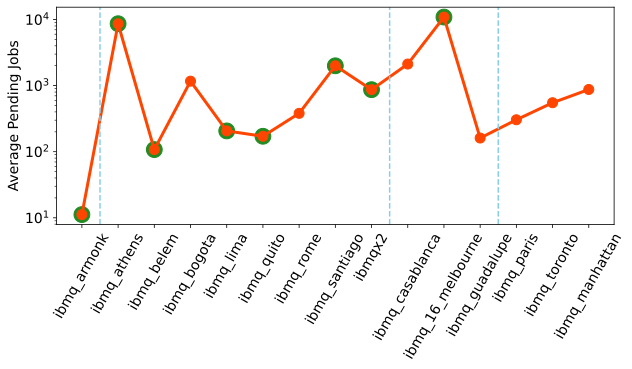

In [56]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from   matplotlib import cm

md = dict()
i=0
for item in machine_names:
    md[item] = avg_data[i]
    i+=1

lists = sorted(md.items(), key=lambda kv: kv[1], reverse=True)

x, y = zip(*lists) # unpack a list of pairs into two tuples

qubit_m = [15,5,7,5,5,65,5,27,5,27,5,5,16,5,1]

x3 = [n for _,n in sorted(zip(qubit_m,x))]
y3 = [md[item] for item in x3]


print(x3)
print(y3)

x2 = ['ibmq_16_melbourne','ibmq_athens','ibmq_santiago','ibmq_belem','ibmq_quito','ibmq_lima','ibmqx2','ibmq_armonk']

y2 = [md[item] for item in x2]

print(y2)
plt.rcParams.update({'font.size': 14})

f=plt.figure(figsize=(10, 4), dpi=100)
plt.plot(x3,y3,marker='.',markersize=20,color='orangered',linewidth=3)
plt.scatter(x2,y2,marker='.',s=1000,color='forestgreen')
plt.axvline(x=0.5, color='skyblue', linestyle='--')
plt.axvline(x=8.5, color='skyblue', linestyle='--')
plt.axvline(x=11.5, color='skyblue', linestyle='--')

#plt.title("")
#plt.xlabel('optimizer calls')
plt.xticks(machine_names,machine_names, rotation='60')
plt.yscale('log')
plt.ylabel('Average Pending Jobs')
#plt.ylim(0,70)
#plt.legend()
f.savefig("SC21_pending.pdf", bbox_inches='tight')
